In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Data from previous distribution
x_values = [0, 100, 200, 250]
probabilities = [0.2, 0.3, 0.4, 0.1]

In [3]:
# --- Functions for PMF and CDF (from original distribution) ---

def calculate_pmf(x_val, x_values, probabilities):
    """
    Calculates the Probability Mass Function (PMF) for a given x_val
    based on the original discrete distribution data.
    For discrete distributions, the PMF gives the probability that a discrete
    random variable is exactly equal to some value.
    """
    try:
        # Find the index of x_val in x_values
        index = x_values.index(x_val)
        return probabilities[index]
    except ValueError:
        # If x_val is not in x_values, its probability is 0
        return 0.0

def calculate_cdf(x_val, x_values, probabilities):
    """
    Calculates the Cumulative Distribution Function (CDF) for a given x_val
    based on the original discrete distribution data.
    For discrete distributions, the CDF gives the probability that a discrete
    random variable is less than or equal to some value.
    """
    cdf_value = 0.0
    # Sort x_values to ensure correct cumulative sum
    sorted_indices = np.argsort(x_values)
    sorted_x_values = [x_values[i] for i in sorted_indices]
    sorted_probabilities = [probabilities[i] for i in sorted_indices]

    for x, p in zip(sorted_x_values, sorted_probabilities):
        if x <= x_val:
            cdf_value += p
        else:
            # Since x_values are sorted, we can stop early
            break
    return cdf_value

In [4]:
# --- Demonstration of PMF and CDF calculations (from original distribution) ---
test_x_values = [-50, 0, 100, 150, 200, 250, 300]
for val in test_x_values:
    pmf = calculate_pmf(val, x_values, probabilities)
    cdf = calculate_cdf(val, x_values, probabilities)
    print(f"For X = {val}: PMF = {pmf:.2f}, CDF = {cdf:.2f}")

# Note on PDF for discrete data:
# For discrete distributions, the concept of a Probability Density Function (PDF)
# is not directly applicable in the same way it is for continuous distributions.
# The PMF (Probability Mass Function) serves the role of defining the probability
# at specific points for discrete random variables.

For X = -50: PMF = 0.00, CDF = 0.00
For X = 0: PMF = 0.20, CDF = 0.20
For X = 100: PMF = 0.30, CDF = 0.50
For X = 150: PMF = 0.00, CDF = 0.50
For X = 200: PMF = 0.40, CDF = 0.90
For X = 250: PMF = 0.10, CDF = 1.00
For X = 300: PMF = 0.00, CDF = 1.00


(np.float64(-0.5), np.float64(39.5), np.float64(24.5), np.float64(-0.5))

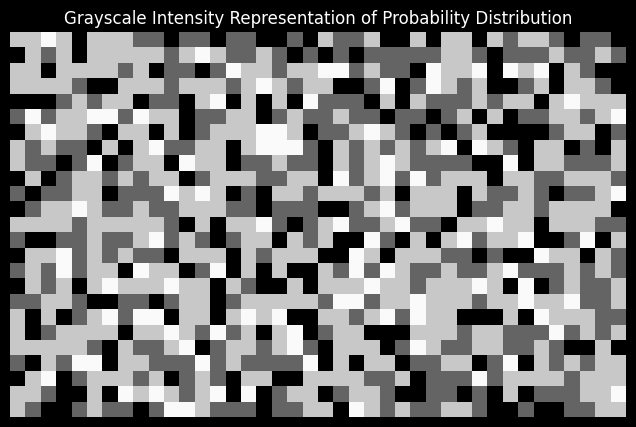

In [5]:
# --- Grayscale Image Generation Code ---

# Create a list of pixel values based on probabilities
# Using 1000 pixels for better visual representation, total pixels must be 1000 * (0.2 + 0.3 + 0.4 + 0.1) = 1000
total_pixels = 1000
image_data = []
for x, p in zip(x_values, probabilities):
    num_pixels = int(total_pixels * p)
    image_data.extend([x] * num_pixels)

# Shuffle the data to avoid showing distinct blocks of same intensity
np.random.shuffle(image_data)

# Convert to NumPy array
image_array = np.array(image_data, dtype=np.uint8)

# Reshape the array into a 2D array. Try to make it somewhat square.
# sqrt(1000) approx 31.6, so 32x32 would be too large, using 25x40
rows = 25
cols = 40
if len(image_array) < rows * cols:
    # Pad with zeros or repeat values if the calculated length is less than desired shape
    # This might happen due to int() conversion reducing total_pixels slightly
    padding_needed = (rows * cols) - len(image_array)
    # Using np.pad to add zeros, or np.tile to repeat the existing data
    # For grayscale, 0 is black, so padding with 0 is acceptable.
    image_array = np.pad(image_array, (0, padding_needed), 'constant', constant_values=0)
elif len(image_array) > rows * cols:
    # If len(image_array) is greater than rows * cols, truncate
    image_array = image_array[:rows*cols]


image_array_2d = image_array.reshape((rows, cols))

# Display and save the image
plt.figure(figsize=(cols/5, rows/5)) # Adjust figure size for better visual
plt.imshow(image_array_2d, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Intensity Representation of Probability Distribution')
plt.axis('off') # Hide axes for cleaner image

In [6]:
# --- New functions and calculations based on the generated image array ---

def calculate_pmf_from_image(image_array_2d):
    """
    Calculates the Probability Mass Function (PMF) from the generated grayscale image array.
    It counts the occurrences of each unique intensity value and normalizes them to probabilities.
    """
    flattened_image = image_array_2d.flatten()
    unique_values, counts = np.unique(flattened_image, return_counts=True)
    total_pixels = len(flattened_image)
    pmf_dict = {val: count / total_pixels for val, count in zip(unique_values, counts)}
    return pmf_dict

def calculate_expected_value_and_variance_from_image(image_array_2d):
    """
    Calculates the Expected Value (Mean) and Variance of the intensity values
    in the grayscale image array.
    """
    flattened_image = image_array_2d.flatten()

    # Calculate Expected Value (Mean)
    expected_value = np.mean(flattened_image)

    # Calculate Variance
    variance = np.var(flattened_image) # np.var calculates population variance by default

    return expected_value, variance

In [7]:
# Calculate PMF from the image
pmf_from_image = calculate_pmf_from_image(image_array_2d)
print("PMF from image array:")
for val, prob in pmf_from_image.items():
    print(f"  P(X = {val}) = {prob:.4f}")

# Calculate Expected Value and Variance from the image
expected_value_image, variance_image = calculate_expected_value_and_variance_from_image(image_array_2d)
print(f"\nExpected Value of image array: {expected_value_image:.3f}")
print(f"Variance of image array: {variance_image:.3f}")
print(f"Standard Deviation of image array: {np.sqrt(variance_image):.3f}")


PMF from image array:
  P(X = 0) = 0.2000
  P(X = 100) = 0.3000
  P(X = 200) = 0.4000
  P(X = 250) = 0.1000

Expected Value of image array: 135.000
Variance of image array: 7025.000
Standard Deviation of image array: 83.815


In [ ]:
# Calculate CDF from the image's PMF
def calculate_cdf_from_image_pmf(pmf_dict):
    """
    Calculates the Cumulative Distribution Function (CDF) from the PMF dictionary
    derived from the image intensities.
    """
    sorted_x_values = sorted(pmf_dict.keys())
    cdf_values = []
    cumulative_prob = 0.0
    for x_val in sorted_x_values:
        cumulative_prob += pmf_dict[x_val]
        cdf_values.append(cumulative_prob)
    return sorted_x_values, cdf_values

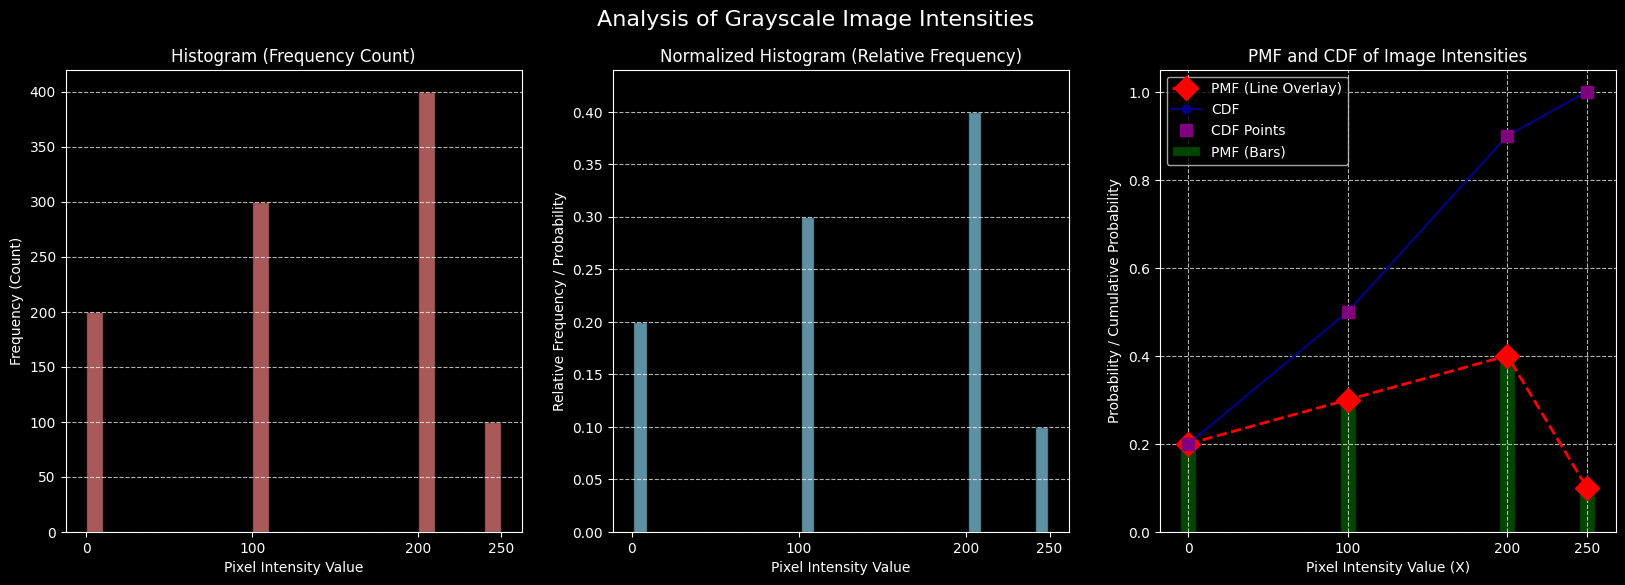

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # 1 row, 3 columns for subplots
fig.suptitle('Analysis of Grayscale Image Intensities', fontsize=16)

# Plot 1: Histogram (Frequency Count)
ax1 = axes[0]
counts, bins, _ = ax1.hist(image_array_2d.flatten(), bins=np.arange(0, 256, 10), color='lightcoral', edgecolor='black', alpha=0.7)
ax1.set_title('Histogram (Frequency Count)')
ax1.set_xlabel('Pixel Intensity Value')
ax1.set_ylabel('Frequency (Count)')
ax1.set_xticks(x_values)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Normalized Histogram (Relative Frequency / Probability)
ax2 = axes[1]
# Explicitly normalize counts by total_pixels
normalized_counts = counts / total_pixels
# Use bar chart to represent discrete probabilities
ax2.bar(bins[:-1] + (bins[1]-bins[0])/2, normalized_counts, width=(bins[1]-bins[0])*0.8, color='skyblue', edgecolor='black', alpha=0.7)
ax2.set_title('Normalized Histogram (Relative Frequency)')
ax2.set_xlabel('Pixel Intensity Value')
ax2.set_ylabel('Relative Frequency / Probability')
ax2.set_xticks(x_values)
ax2.set_ylim(0, max(probabilities) * 1.1) # Set y-limit based on original probabilities for clarity
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Combined PMF (Bar & Line) and CDF (Line)
ax3 = axes[2]
pmf_x_sorted = sorted(pmf_from_image.keys())
pmf_y_sorted = [pmf_from_image[x] for x in pmf_x_sorted]

# Plotting PMF as a bar chart
ax3.bar(pmf_x_sorted, pmf_y_sorted, width=10, color='darkgreen', edgecolor='black', alpha=0.7, label='PMF (Bars)')

# Add line plot overlay on PMF bars
ax3.plot(pmf_x_sorted, pmf_y_sorted, color='red', linestyle='--', marker='D', markersize=12, linewidth=2, label='PMF (Line Overlay)', zorder=5)

cdf_x, cdf_y = calculate_cdf_from_image_pmf(pmf_from_image)

# Plot CDF as a smooth line
ax3.plot(cdf_x, cdf_y, color='darkblue', linestyle='-', marker='o', markersize=6, label='CDF')
# Add a second line plot to highlight discrete points (optional, but good for clarity)
ax3.plot(cdf_x, cdf_y, color='purple', linestyle='None', marker='s', markersize=8, label='CDF Points', zorder=5)


ax3.set_title('PMF and CDF of Image Intensities')
ax3.set_xlabel('Pixel Intensity Value (X)')
ax3.set_ylabel('Probability / Cumulative Probability')
ax3.set_xticks(x_values)
ax3.set_ylim(0, 1.05) # Y-limit for probabilities (0 to 1)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.legend()
